In [58]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [59]:
data=pd.read_csv('creditscore.csv')

In [60]:
df=pd.DataFrame(data)



In [61]:
df.head()


,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [62]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


In [63]:
df.head()



,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [83]:
df.head(5)




,Age,Income,Education,Home Ownership,Credit Score
0,25,50000,0,0,2
1,30,100000,1,1,2
2,35,75000,2,1,2
3,40,125000,3,1,2
4,45,100000,0,1,2


In [84]:
df=df.replace({
    'High':2,
    'Low':3,
    'Average':4
})

In [85]:
df=df.replace({
    'Rented':0,
    'Owned':1
})

In [86]:
df.head(5)


,Age,Income,Education,Home Ownership,Credit Score
0,25,50000,0,0,2
1,30,100000,1,1,2
2,35,75000,2,1,2
3,40,125000,3,1,2
4,45,100000,0,1,2


In [87]:
df=df.replace({
    "Bachelor's Degree":0,
    "Master's Degree":1,
    'Doctorate':2,
    'High School Diploma':3,
    "Associate's Degree":4
})



In [88]:
df.head(10)


,Age,Income,Education,Home Ownership,Credit Score
0,25,50000,0,0,2
1,30,100000,1,1,2
2,35,75000,2,1,2
3,40,125000,3,1,2
4,45,100000,0,1,2
5,50,150000,1,1,2
6,26,40000,4,0,4
7,31,60000,0,0,4
8,36,80000,1,1,2
9,41,105000,2,1,2


In [89]:
corre=df.corr()[['Credit Score']]


<Axes: >

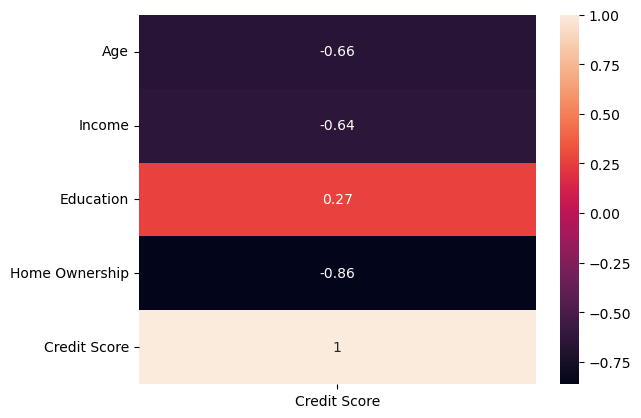

In [90]:
sns.heatmap(corre,annot=True)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
df.head()


In [92]:
x=df[['Age','Income','Education','Home Ownership']]
y=df['Credit Score']


In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)


In [94]:
model=DecisionTreeClassifier(random_state=42)
model.fit(x_train,y_train)


DecisionTreeClassifier(random_state=42)

In [95]:
y_pred=model.predict(x_test)
print(y_pred)


[4 2 4 2 2 4 2 2 2 2 4 3 2 2 3 2 4 3 2 2 2 3 3 2 2 2 2 2 2 4 2 2 2]


In [96]:
accuracy=accuracy_score(y_test,y_pred)
print("accuracy is:",accuracy)


accuracy is: 0.9696969696969697


<Axes: >

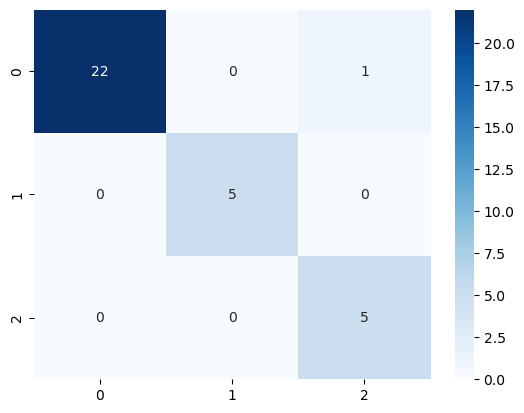

In [101]:
conf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, fmt='d', cmap='Blues',annot=True)


In [105]:
from sklearn.tree import plot_tree

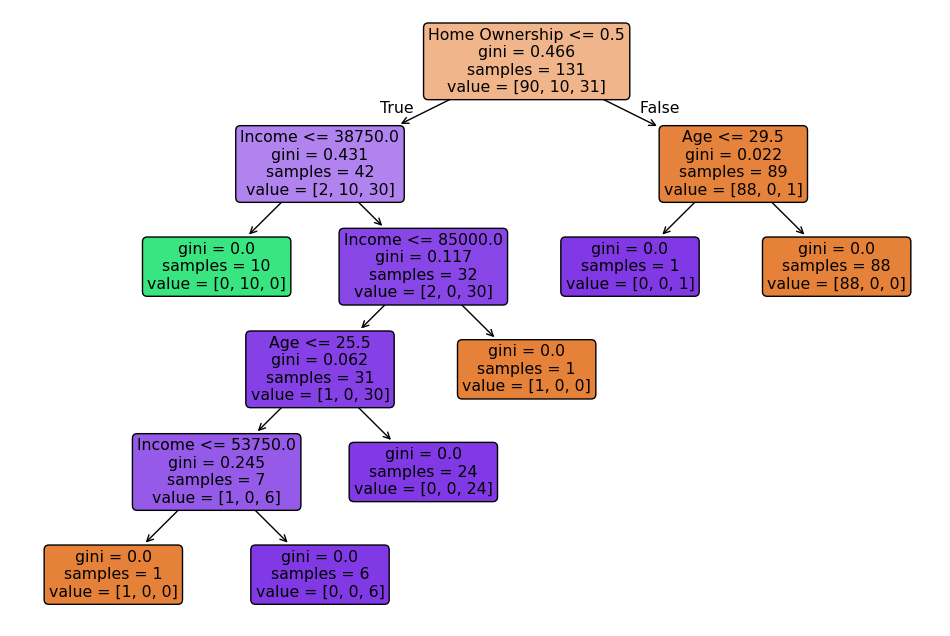

In [106]:
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=x.columns, filled=True, rounded=True)
plt.show()
